# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [4]:
#Sua resposta aqui
import pandas as pd
df = pd.read_csv("/content/carros (2).csv")
df.head(15)
df.info()

print(f'Quantidade de dados:\n {len(df)}')

print(f'Quantidade de atributos:\n {df.shape[1]}')

print(f'Dados faltantes:\n {df.isnull().sum().sum()}')
tipo_dado = df.dtypes.unique()
print(tipo_dado)


#a quantidade de atributos 9, sim existem valores faltantes, os dados são do tipo object, float64, int64.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB
Quantidade de dados:
 4345
Quantidade de atributos:
 9
Dados faltantes:
 322
[dtype('O') dtype('float64') dtype('int64')]


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [9]:
#Sua resposta aqui

df['Km'] = df['Mileage/1000'] * 1000 * 1.6
print(df)
df.head(15)

traducao = {
    'Brand': 'marca',
    'Price': 'Preço',
    'Body': 'Tipo',
    'Mileage/1000': 'Quilometragem',
    'EngineV': 'MotorV',
    'Engine Type':'Tipo de motor',
    'Registration': 'Cadastro',
    'Year':'Ano',
    'Model':'Modelo'
}
df.rename(columns=traducao)


              Brand     Price       Body  Mileage/1000  EngineV Engine Type  \
0               BMW    4200.0      sedan           277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van           427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan           358      5.0         Gas   
3              Audi   23000.0  crossover           240      4.2      Petrol   
4            Toyota   18300.0  crossover           120      2.0      Petrol   
...             ...       ...        ...           ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan             9      3.0      Diesel   
4341            BMW    6500.0      sedan             1      3.5      Petrol   
4342            BMW    8000.0      sedan           194      2.0      Petrol   
4343         Toyota   14200.0      sedan            31      NaN      Petrol   
4344     Volkswagen   13500.0        van           124      2.0      Diesel   

     Registration  Year              Model        K

,marca,Preço,Tipo,Quilometragem,MotorV,Tipo de motor,Cadastro,Ano,Modelo,Km
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,443200.0
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,683200.0
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,572800.0
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,384000.0
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,192000.0
...,...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,14400.0
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,1600.0
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,310400.0
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla,49600.0


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [8]:
#Sua resposta aqui
!pip3 install seaborn





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

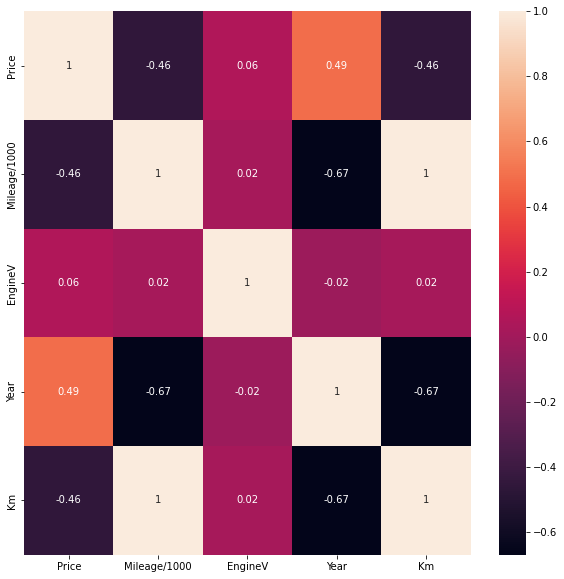

In [22]:
import seaborn as sns
correlacao = df.corr().round(2)
correlacao
plt.figure(figsize = [10,10])
sns.heatmap(correlacao, annot=True)







/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Price', ylabel='Km'>

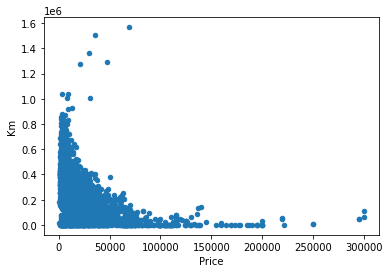

In [50]:

df.plot.scatter('Price','Km')



/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Year', ylabel='EngineV'>

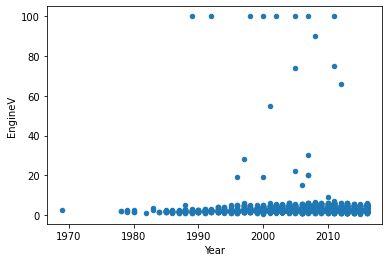

In [51]:
df.plot.scatter('Year', 'EngineV')

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Supervisionado, porque estou colocando dados e acompanhando sua predição, induzindo a máquina ao certo.Os dados colocados possuem um reultado esperado.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta:Supervisionado, pois é usado para prever uma variável continua a partide de um conjunto de variaceis independentes

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1:

Algoritmo 2:

In [58]:
from sklearn.linear_model import LinearRegression
 x= df.

ValueError: ignored

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [41]:
#Sua resposta aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage/1000  4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
 9   Km            4345 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 339.6+ KB


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(['Price'], axis=1)             

Y = df['Year']             
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

Formato das tabelas de dados (4345, 9) e saidas (4345,)
(3476, 9)
(869, 9)
(3476,)
(869,)


7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [ ]:
#Sua resposta aqui

7.2 - Algoritmo 2:  (0,5)

In [ ]:
#Sua resposta aqui

7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta:

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [ ]:
#Sua resposta aqui